## Final Project : E503 : Multi-variate Time Series Forecasting - Air Pollution

### Importing required libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from sklearn.impute import SimpleImputer
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')

In [123]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/AirQuality.csv', delimiter=';')

# Display the first few rows of the DataFrame
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [124]:
# shape of our dataset
print("Number of rows in dataset:",data.shape[0])
print("Number of columns in dataset:",data.shape[1])

Number of rows in dataset: 9471
Number of columns in dataset: 17


In [125]:
# getting the names of the columns
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [126]:
# getting the dtypes of the all columns
data.describe(include = "all")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357,9357,9357,9357.000000,9357.000000,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357,9357,9357,0.0,0.0
unique,391,24,104,NaN,NaN,408,NaN,NaN,NaN,NaN,NaN,NaN,437,754,6684,NaN,NaN
top,21/09/2004,18.00.00,-200,NaN,NaN,"-200,0",NaN,NaN,NaN,NaN,NaN,NaN,-200,-200,-200,NaN,NaN
freq,24,390,1592,NaN,NaN,366,NaN,NaN,NaN,NaN,NaN,NaN,366,366,366,NaN,NaN
mean,NaN,NaN,NaN,1048.990061,-159.090093,NaN,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,329.832710,139.789093,NaN,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-200.000000,-200.000000,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,921.000000,-200.000000,NaN,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1053.000000,-200.000000,NaN,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1221.000000,-200.000000,NaN,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN,NaN,NaN,NaN


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [128]:
# checking null values in our dataset
data.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [129]:
# Check for non-null values in the unnamed columns
non_null_values = data[['Unnamed: 15', 'Unnamed: 16']].dropna()

# Display any non-null values (if they exist)
non_null_values


,Unnamed: 15,Unnamed: 16


In [130]:
# Dropping the unnamed columns
data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], inplace=True)

In [131]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [132]:
data.tail(114)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# dropping the last 114 rows which are fully empty
data.dropna(inplace=True)

In [134]:
# Checking null values in our dataset
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [135]:
# Columns with comma as decimal separator
comma_decimal_columns = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

# Replace comma with period and convert to float
for col in comma_decimal_columns:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Display the cleaned data
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [136]:
# Replace -200 (placeholder for missing values) with NaN
data.replace(-200, np.nan, inplace=True)

In [137]:
data.isna().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [138]:
percent_NaN = []
columns = data.columns
for col in columns:
    pNaN =  (data[col].isna().sum()/data.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
print(nan_percent_df)

               %_NaN_in_Column
NMHC(GT)             90.231912
CO(GT)               17.986534
NO2(GT)              17.548360
NOx(GT)              17.516298
PT08.S1(CO)           3.911510
C6H6(GT)              3.911510
PT08.S2(NMHC)         3.911510
PT08.S3(NOx)          3.911510
PT08.S4(NO2)          3.911510
PT08.S5(O3)           3.911510
T                     3.911510
RH                    3.911510
AH                    3.911510
Date                  0.000000
Time                  0.000000


In [139]:
data.drop('NMHC(GT)', axis=1, inplace=True, errors = 'ignore')
data = data.dropna()
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


### Since the data is real valued, we should replace all the null values with mean of each column

In [141]:
# for i in data:
#     data[i] = data[i].fillna(data[i].mean())

In [142]:
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [143]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Handling Outliers

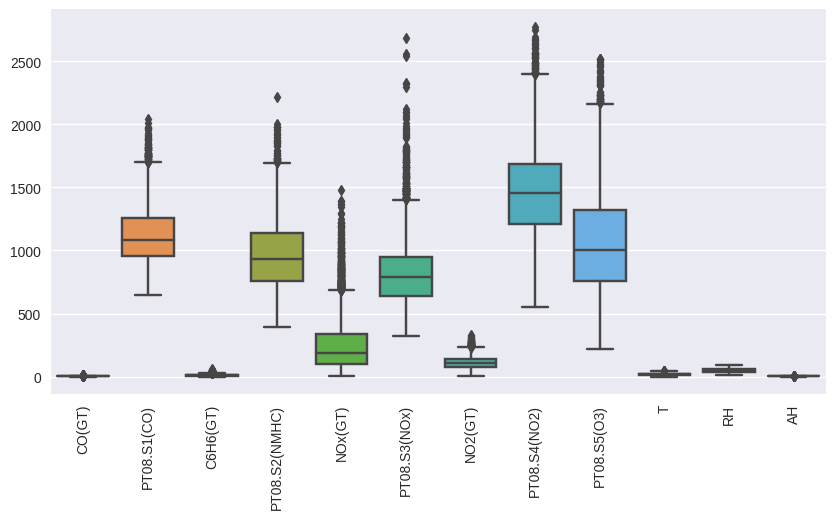

In [144]:
# plotting a boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=data)
plt.xticks(rotation='vertical')
plt.show()

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset.

It is necessary to handle outliers because they affect the model's distribution and ultimately the model's accuracy.

We can use boxplot to get an idea of the outliers present in the dataset.

The box represents the interquartile range (IQR), with the median indicated by a line inside the box.

Any points outside the whiskers are considered potential outliers.

In [145]:
numerical_columns = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']

In [146]:
df = data[numerical_columns]

In [147]:
# Detecting outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [148]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(f'Number of outliers in each column:\n{outliers}')

Number of outliers in each column:
CO(GT)           191
PT08.S1(CO)       89
C6H6(GT)         160
PT08.S2(NMHC)     46
NOx(GT)          354
PT08.S3(NOx)     182
NO2(GT)           90
PT08.S4(NO2)      58
PT08.S5(O3)       56
T                  8
RH                 0
AH                22
dtype: int64


In [149]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False,False,False,False,False


In [150]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [151]:
# outliers are now being handled and are replaced with that column's median value
((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

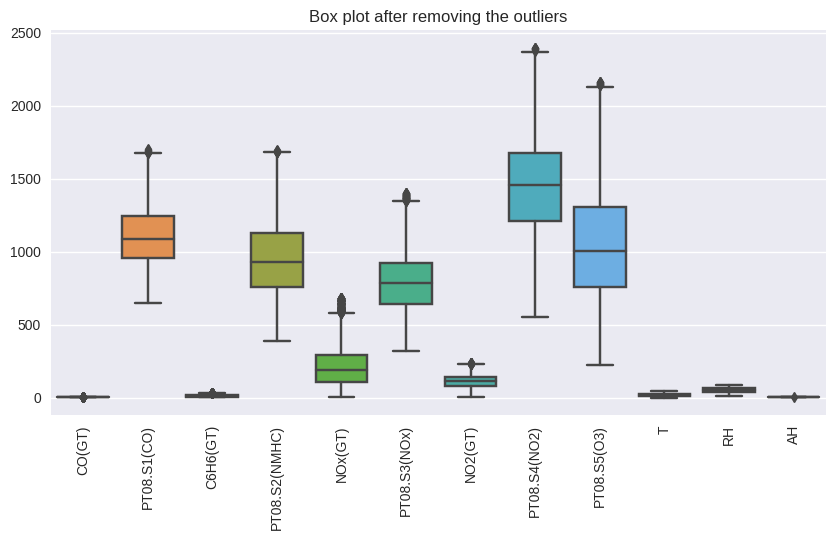

In [152]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.title('Box plot after removing the outliers')
plt.show()

### Checking if there are any categorical features and if there are any, we have to convert them to numerical features

In [153]:
df.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [154]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


#### As we can see above, there aren't any categorical featutres in our dataset

# Exploratory Data Analysis and Visualization

In [155]:
# using pearson's correlation to find the correlation between all the features
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.810697,0.866790,0.850195,0.633051,-0.687801,0.635611,0.556991,0.782181,0.047930,0.021564,0.057393
PT08.S1(CO),0.810697,1.000000,0.820084,0.851557,0.575454,-0.751999,0.603619,0.630528,0.862203,0.035286,0.161618,0.153534
C6H6(GT),0.866790,0.820084,1.000000,0.923399,0.553576,-0.711799,0.577850,0.705353,0.802455,0.213345,-0.056935,0.182002
PT08.S2(NMHC),0.850195,0.851557,0.923399,1.000000,0.575558,-0.760920,0.615175,0.740083,0.847726,0.235719,-0.059329,0.206862
NOx(GT),0.633051,0.575454,0.553576,0.575558,1.000000,-0.640865,0.663508,0.123793,0.650630,-0.230311,0.168956,-0.126084
PT08.S3(NOx),-0.687801,-0.751999,-0.711799,-0.760920,-0.640865,1.000000,-0.609393,-0.470190,-0.783919,-0.048707,-0.150844,-0.198299
NO2(GT),0.635611,0.603619,0.577850,0.615175,0.663508,-0.609393,1.000000,0.129593,0.671314,-0.185165,-0.096993,-0.323798
PT08.S4(NO2),0.556991,0.630528,0.705353,0.740083,0.123793,-0.470190,0.129593,1.000000,0.538373,0.582925,-0.019116,0.651475
PT08.S5(O3),0.782181,0.862203,0.802455,0.847726,0.650630,-0.783919,0.671314,0.538373,1.000000,-0.037112,0.163382,0.091604
T,0.047930,0.035286,0.213345,0.235719,-0.230311,-0.048707,-0.185165,0.582925,-0.037112,1.000000,-0.559456,0.660884


In [156]:
df_hourly = data.copy()

In [157]:
df_hourly.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [158]:
df_hourly['DateTime'] = pd.to_datetime(df_hourly['Date'] + ' ' + df_hourly['Time'], format='%d/%m/%Y %H.%M.%S')
df_hourly.drop(['Date', 'Time'], axis=1, inplace=True)

In [159]:
df_hourly.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [160]:
data['Date']

0       10/03/2004
1       10/03/2004
2       10/03/2004
3       10/03/2004
4       10/03/2004
           ...    
9352    04/04/2005
9353    04/04/2005
9354    04/04/2005
9355    04/04/2005
9356    04/04/2005
Name: Date, Length: 6941, dtype: object

In [161]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [162]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Combine Date and Time into a single DateTime column
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S')

# Set this combined column as the DataFrame index
data.set_index('DateTime', inplace=True)

# Drop the original Date and Time columns as they are no longer needed
data.drop(['Date', 'Time'], axis=1, inplace=True)

# Group by Date and calculate daily means
daily_data = data.resample('D').mean()

# Fill missing dates with the mean of each column
# First, create a continuous date range
all_dates = pd.date_range(start=daily_data.index.min(), end=daily_data.index.max(), freq='D')

# Reindex the DataFrame to this date range, filling missing values with NaN
daily_data = daily_data.reindex(all_dates)

# Fill NaN values with the column-wise mean
daily_data.fillna(daily_data.mean(), inplace=True)

# Check the resulting DataFrame
print(daily_data.head())


              CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
2004-03-10  1.966667  1316.500000   8.450000     912.333333  132.000000   
2004-03-11  2.313636  1265.409091   8.568182     879.954545  150.000000   
2004-03-12  2.900000  1309.285714  12.666667    1036.476190  181.000000   
2004-03-13  2.740909  1346.227273  11.381818    1010.181818  187.863636   
2004-03-14  2.472727  1372.409091   9.836364     950.590909  150.090909   

            PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T  \
2004-03-10   1167.333333  108.833333   1545.500000  1096.000000  12.033333   
2004-03-11   1233.227273  102.863636   1550.727273   922.727273   9.804545   
2004-03-12   1052.619048  120.285714   1651.238095  1121.000000  11.838095   
2004-03-13    978.454545  120.500000   1613.954545  1268.818182  13.363636   
2004-03-14    999.090909  111.681818   1608.409091  1240.545455  16.390909   

                   RH        AH  
2004-03-10  54.900000  0.765633  
2004-03-11  

In [163]:
dataviz=daily_data
dataviz.shape
#dataviz.to_csv('/content/cleaned_air.csv',sep=',')

In [164]:
dataviz.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004-03-10,1.966667,1316.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,2.313636,1265.409091,8.568182,879.954545,150.000000,1233.227273,102.863636,1550.727273,922.727273,9.804545,64.413636,0.778191
2004-03-12,2.900000,1309.285714,12.666667,1036.476190,181.000000,1052.619048,120.285714,1651.238095,1121.000000,11.838095,49.614286,0.667024
2004-03-13,2.740909,1346.227273,11.381818,1010.181818,187.863636,978.454545,120.500000,1613.954545,1268.818182,13.363636,49.918182,0.733727
2004-03-14,2.472727,1372.409091,9.836364,950.590909,150.090909,999.090909,111.681818,1608.409091,1240.545455,16.390909,47.631818,0.848382


In [165]:
dataviz.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [166]:

# dataviz['DateTime'] = pd.to_datetime(dataviz['DateTime'])

# # Set the 'DateTime' column as the index
# dataviz.set_index('DateTime', inplace=True)


In [167]:
# Ensure a continuous hourly index


In [168]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

full_index = pd.date_range(start=dataviz.index.min(), end=dataviz.index.max(), freq='H')
print(full_index)

dataviz = dataviz[~dataviz.index.duplicated()]  # Remove duplicates if any
dataviz.index.freq = dataviz.index.inferred_freq

# Check for NaN values
print(dataviz.isnull().sum())


DatetimeIndex(['2004-03-10 00:00:00', '2004-03-10 01:00:00',
               '2004-03-10 02:00:00', '2004-03-10 03:00:00',
               '2004-03-10 04:00:00', '2004-03-10 05:00:00',
               '2004-03-10 06:00:00', '2004-03-10 07:00:00',
               '2004-03-10 08:00:00', '2004-03-10 09:00:00',
               ...
               '2005-04-03 15:00:00', '2005-04-03 16:00:00',
               '2005-04-03 17:00:00', '2005-04-03 18:00:00',
               '2005-04-03 19:00:00', '2005-04-03 20:00:00',
               '2005-04-03 21:00:00', '2005-04-03 22:00:00',
               '2005-04-03 23:00:00', '2005-04-04 00:00:00'],
              dtype='datetime64[ns]', length=9361, freq='H')
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [169]:
# Function to implement SARIMA model and forecast
def forecast_sarima(series, order, seasonal_order, forecast_period):
    # Fit the SARIMA model
    model = SARIMAX(series, order=order, seasonal_order=seasonal_order, enforce_stationarity=True, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Forecast
    forecast = model_fit.get_forecast(steps=forecast_period)
    forecast_index = pd.date_range(series.index[-1], periods=forecast_period+1, closed='right')
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

    # Calculate accuracy (MSE)
    forecast_errors = mean_squared_error(series[-forecast_period:], forecast_series[:forecast_period], squared=False)

    return forecast_series, forecast_errors

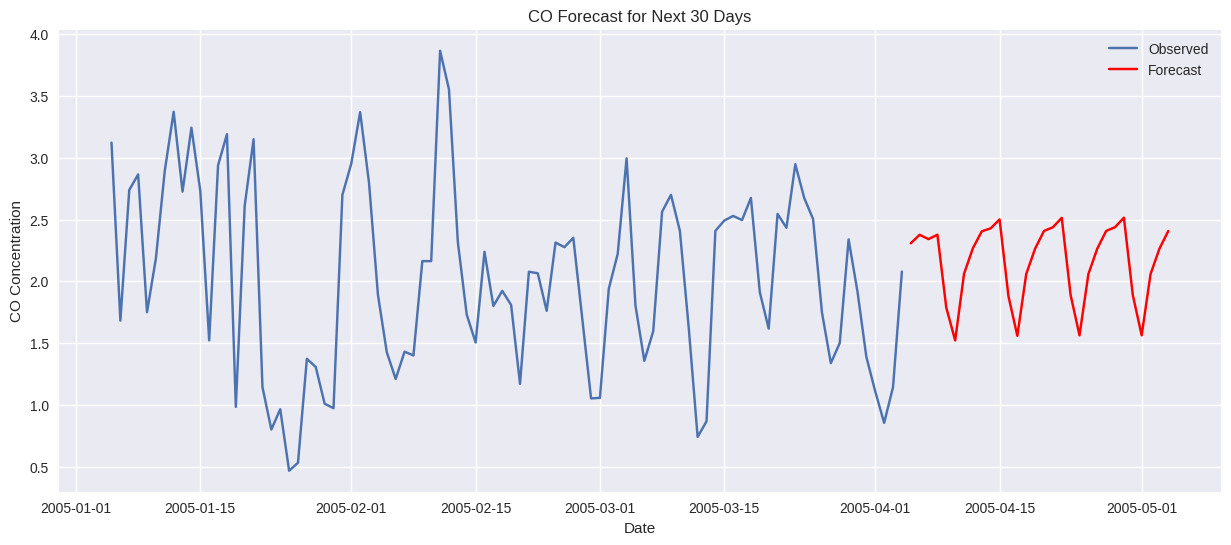

(2005-04-05    2.307935
 2005-04-06    2.376897
 2005-04-07    2.341618
 2005-04-08    2.377345
 2005-04-09    1.786654
 2005-04-10    1.521428
 2005-04-11    2.061461
 2005-04-12    2.268969
 2005-04-13    2.404788
 2005-04-14    2.428657
 2005-04-15    2.501086
 2005-04-16    1.878697
 2005-04-17    1.558575
 2005-04-18    2.058942
 2005-04-19    2.264594
 2005-04-20    2.407407
 2005-04-21    2.437394
 2005-04-22    2.513610
 2005-04-23    1.888026
 2005-04-24    1.562336
 2005-04-25    2.058676
 2005-04-26    2.264145
 2005-04-27    2.407671
 2005-04-28    2.438281
 2005-04-29    2.514883
 2005-04-30    1.888975
 2005-05-01    1.562719
 2005-05-02    2.058649
 2005-05-03    2.264099
 2005-05-04    2.407698
 Freq: D, Name: predicted_mean, dtype: float64,
 0.706847015027749)

In [170]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days
order= (1,0,1)

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(daily_data['CO(GT)'], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['CO(GT)'][-90:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('CO Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

co_forecast, co_mse


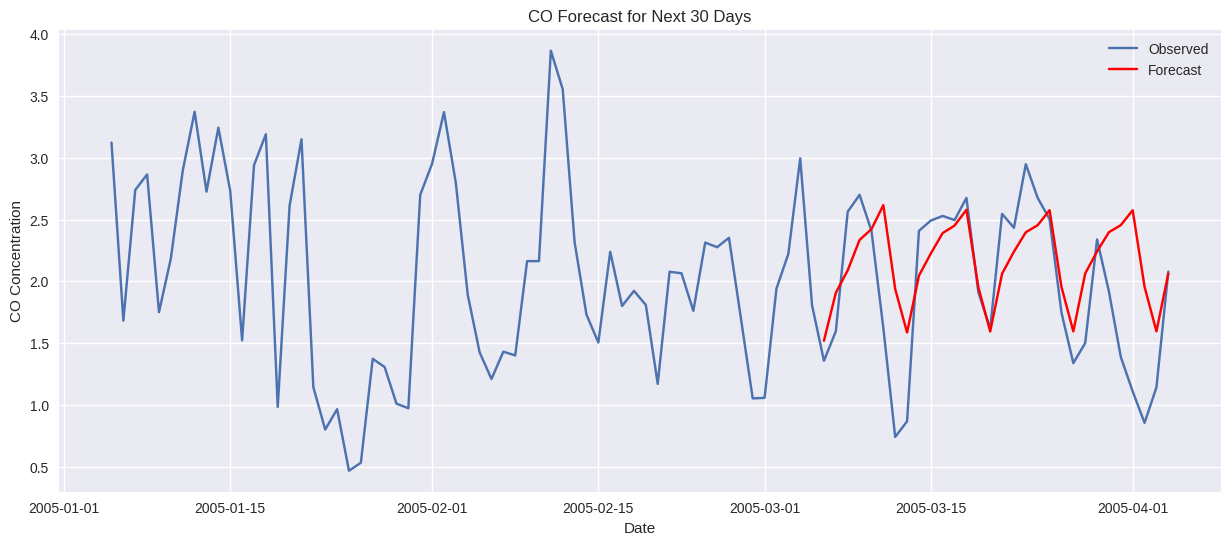

(2005-03-06    1.518954
 2005-03-07    1.907077
 2005-03-08    2.088805
 2005-03-09    2.334955
 2005-03-10    2.422365
 2005-03-11    2.616668
 2005-03-12    1.937012
 2005-03-13    1.585683
 2005-03-14    2.045855
 2005-03-15    2.225147
 2005-03-16    2.390872
 2005-03-17    2.451205
 2005-03-18    2.579649
 2005-03-19    1.953375
 2005-03-20    1.593994
 2005-03-21    2.061423
 2005-03-22    2.240175
 2005-03-23    2.397076
 2005-03-24    2.454408
 2005-03-25    2.575706
 2005-03-26    1.955167
 2005-03-27    1.594904
 2005-03-28    2.063110
 2005-03-29    2.241800
 2005-03-30    2.397747
 2005-03-31    2.454755
 2005-04-01    2.575281
 2005-04-02    1.955360
 2005-04-03    1.595003
 2005-04-04    2.063292
 Freq: D, Name: predicted_mean, dtype: float64,
 0.8503283457536139)

In [171]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(daily_data['CO(GT)'][:-30], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['CO(GT)'][-90:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('CO Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

co_forecast, co_mse

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_values = daily_data.loc[co_forecast.index, 'CO(GT)']

# Calculate accuracy metrics
mse = mean_squared_error(actual_values, co_forecast)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(actual_values, co_forecast)

# Print the accuracy metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.3219901725732245
Root Mean Squared Error: 0.5674417790163362
Mean Absolute Error: 0.41463558519268273


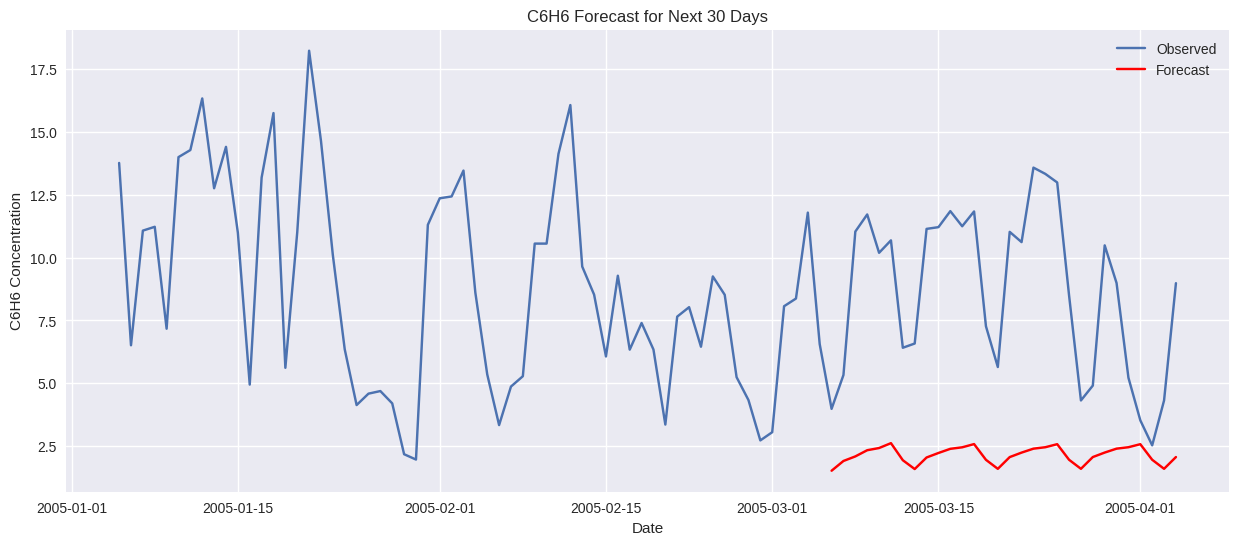

(2005-03-06     5.735094
 2005-03-07     9.383969
 2005-03-08    10.794116
 2005-03-09    11.668057
 2005-03-10    11.867031
 2005-03-11    12.257702
 2005-03-12     8.887482
 2005-03-13     6.990352
 2005-03-14    10.385423
 2005-03-15    11.558189
 2005-03-16    12.061454
 2005-03-17    12.161965
 2005-03-18    12.349245
 2005-03-19     9.042030
 2005-03-20     7.074694
 2005-03-21    10.447618
 2005-03-22    11.603193
 2005-03-23    12.084980
 2005-03-24    12.178873
 2005-03-25    12.355065
 2005-03-26     9.050432
 2005-03-27     7.079294
 2005-03-28    10.450940
 2005-03-29    11.605561
 2005-03-30    12.086223
 2005-03-31    12.179755
 2005-04-01    12.355378
 2005-04-02     9.050863
 2005-04-03     7.079530
 2005-04-04    10.451109
 Freq: D, Name: predicted_mean, dtype: float64,
 5.1466592088005605)

In [173]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days

# Forecasting for CO
c6h6_forecast, c6h6_mse = forecast_sarima(daily_data['C6H6(GT)'][:-30], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['C6H6(GT)'][-90:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('C6H6 Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

c6h6_forecast, c6h6_mse

In [174]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

actual_values = daily_data.loc[c6h6_forecast.index, 'C6H6(GT)']

# Calculate accuracy metrics
mse = mean_squared_error(actual_values, c6h6_forecast)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(actual_values, c6h6_forecast)

# Print the accuracy metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 9.052504901735654
Root Mean Squared Error: 3.0087380912494948
Mean Absolute Error: 2.0872979405609553


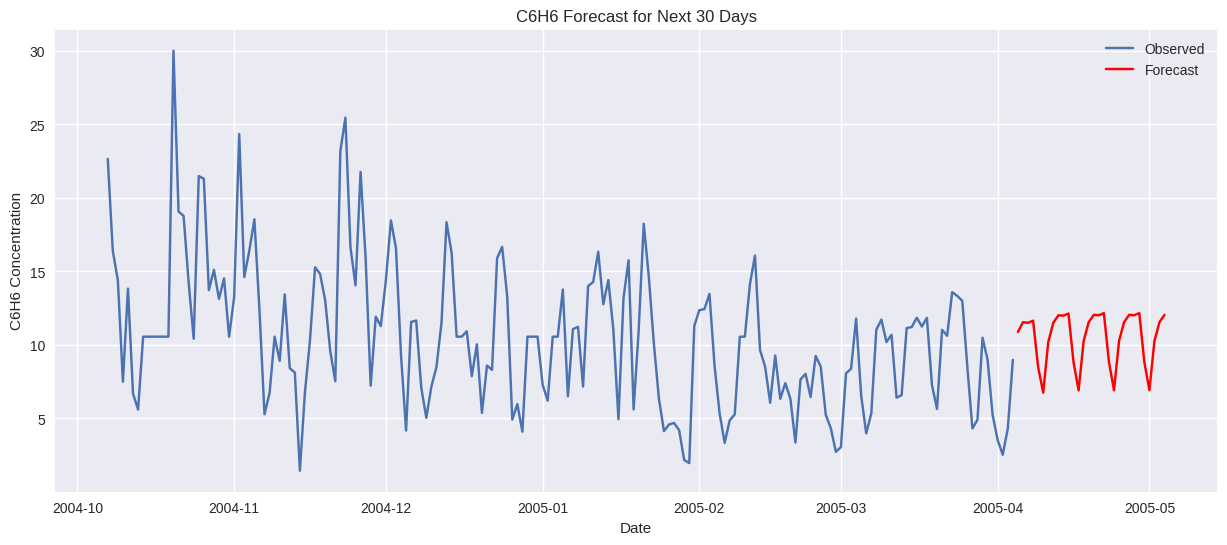

(2005-04-05    10.880356
 2005-04-06    11.546984
 2005-04-07    11.503827
 2005-04-08    11.649972
 2005-04-09     8.485614
 2005-04-10     6.755267
 2005-04-11    10.193440
 2005-04-12    11.508575
 2005-04-13    12.015453
 2005-04-14    11.992651
 2005-04-15    12.136436
 2005-04-16     8.823973
 2005-04-17     6.905156
 2005-04-18    10.270876
 2005-04-19    11.550140
 2005-04-20    12.044253
 2005-04-21    12.019198
 2005-04-22    12.161041
 2005-04-23     8.840791
 2005-04-24     6.912800
 2005-04-25    10.274875
 2005-04-26    11.552306
 2005-04-27    12.045722
 2005-04-28    12.020496
 2005-04-29    12.162212
 2005-04-30     8.841586
 2005-05-01     6.913165
 2005-05-02    10.275067
 2005-05-03    11.552410
 2005-05-04    12.045792
 Freq: D, Name: predicted_mean, dtype: float64,
 4.267358443096531)

In [175]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(daily_data['C6H6(GT)'], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['C6H6(GT)'][-180:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('C6H6 Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

co_forecast, co_mse

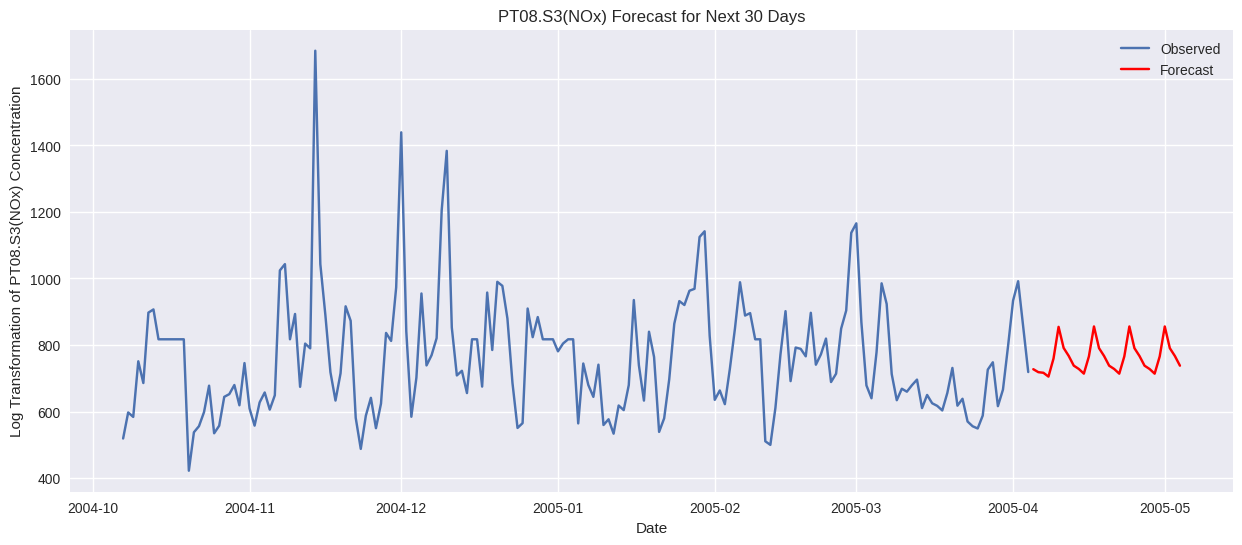

(2005-04-05    727.288108
 2005-04-06    718.367702
 2005-04-07    716.534028
 2005-04-08    705.070141
 2005-04-09    759.443228
 2005-04-10    854.548509
 2005-04-11    791.192995
 2005-04-12    767.358138
 2005-04-13    738.066516
 2005-04-14    728.028518
 2005-04-15    714.011329
 2005-04-16    765.925634
 2005-04-17    855.772345
 2005-04-18    790.518662
 2005-04-19    766.948205
 2005-04-20    737.864742
 2005-04-21    727.897672
 2005-04-22    713.889636
 2005-04-23    765.829434
 2005-04-24    855.759227
 2005-04-25    790.534430
 2005-04-26    766.957319
 2005-04-27    737.869225
 2005-04-28    727.900427
 2005-04-29    713.891989
 2005-04-30    765.831224
 2005-05-01    855.759511
 2005-05-02    790.534182
 2005-05-03    766.957173
 2005-05-04    737.869153
 Freq: D, Name: predicted_mean, dtype: float64,
 142.3570233630347)

In [176]:
# Adjust SARIMA model parameters for daily data
seasonal_order = (1, 1, 1, 7)  # assuming weekly seasonality

# Adjust the forecast period for daily data
forecast_period = 30  # 30 days

# Forecasting for CO
co_forecast, co_mse = forecast_sarima(daily_data['PT08.S3(NOx)'], order, seasonal_order, forecast_period)

# Adjust the plotting for daily data
plt.figure(figsize=(15, 6))
plt.plot(daily_data['PT08.S3(NOx)'][-180:], label='Observed')  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red')
plt.title('PT08.S3(NOx) Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Log Transformation of PT08.S3(NOx) Concentration')
plt.legend()
plt.show()

co_forecast, co_mse

In [177]:
# # Function to implement SARIMAX model and forecast
# def forecast_sarimax_multi(endog, exog, order, seasonal_order, forecast_period):
#     # Fit the SARIMAX model
#     # 'endog' is the endogenous variable (the one we want to forecast)
#     # 'exog' is the dataframe containing all exogenous variables
#     model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order,
#                     enforce_stationarity=True, enforce_invertibility=False)
#     model_fit = model.fit(disp=False)

#     # Get the dates for forecasting
#     forecast_index = pd.date_range(endog.index[-1], periods=forecast_period, freq='D')

#     # Forecast
#     # The exog variables for the forecast period need to be provided as well
#     exog_forecast = exog[-forecast_period:]  # This assumes you have future values for exogenous variables
#     forecast = model_fit.get_forecast(steps=forecast_period, exog=exog_forecast)
#     forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

#     # Calculate accuracy (MSE)
#     # Note: You can only calculate MSE if you have actual observed values for the forecast period
#     # If you don't have them because it's a future forecast, you cannot calculate MSE yet
#     forecast_errors = None
#     if endog.index[-forecast_period] in endog:  # Check if we have actual values for the forecast period
#         actual_values = endog[-forecast_period:]
#         forecast_errors = mean_squared_error(actual_values, forecast_series, squared=False)

#     return forecast_series, forecast_errors



def forecast_sarimax_multi(endog, exog, order, seasonal_order, forecast_period):
    # Fit the SARIMAX model
    model = SARIMAX(endog, exog=exog, order=order, seasonal_order=seasonal_order, enforce_stationarity=True, enforce_invertibility=False)
    model_fit = model.fit(disp=False)

    # Get the dates for forecasting
    forecast_index = pd.date_range(endog.index[-1] + pd.Timedelta(days=1), periods=forecast_period, freq='D')

    # Forecast
    exog_forecast = exog.iloc[-forecast_period:]  # Ensure this matches the forecast period
    if exog_forecast.isnull().any().any():
        raise ValueError("Exogenous variables for the forecast period contain NaN values.")

    forecast = model_fit.get_forecast(steps=forecast_period, exog=exog_forecast)
    forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

    # Calculate accuracy if possible
    forecast_errors = None
    actual_values = endog.tail(forecast_period)
    if len(actual_values) == forecast_period:
        forecast_errors = mean_squared_error(actual_values, forecast_series, squared=False)

    return forecast_series, forecast_errors




In [178]:
# Select the endogenous variable
endog = daily_data['CO(GT)'][:-30]
print(endog.isnull().sum())


# Select the exogenous variables - all other columns except for the one we are forecasting
exog = daily_data.drop('CO(GT)', axis=1)[:-30]
print(exog.isnull().sum())

forecast_period = 30

0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


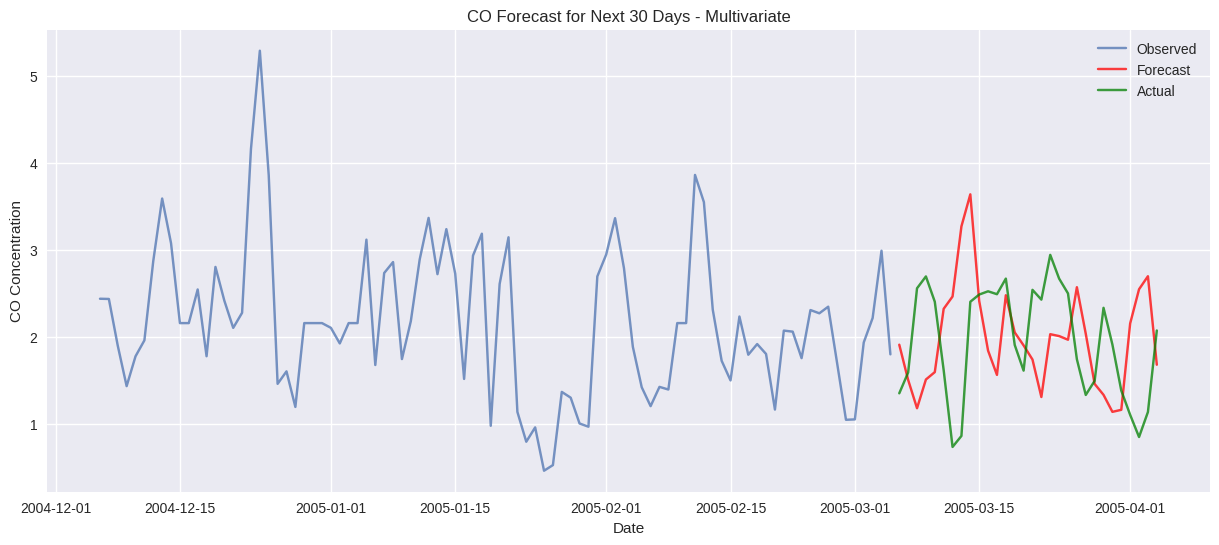

Mean Squared Error: 0.2636381745054667


In [179]:
# Define the SARIMAX model order and seasonal order
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 7)  # Weekly seasonality for daily data

# Forecasting
co_forecast, co_mse = forecast_sarimax_multi(endog, exog, order, seasonal_order, forecast_period)

import matplotlib.pyplot as plt

# Assuming 'actual_forecast_values' contains the actual values for the forecast period
actual_forecast_values = daily_data['CO(GT)'][-forecast_period:]

# Plotting the forecast and actual values
plt.figure(figsize=(15, 6))
plt.plot(endog[-90:], label='Observed', alpha=0.75)  # last 90 days (3 months)
plt.plot(co_forecast, label='Forecast', color='red', alpha=0.75)
plt.plot(actual_forecast_values.index, actual_forecast_values, label='Actual', color='green', alpha=0.75)
plt.title('CO Forecast for Next 30 Days - Multivariate')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.legend()
plt.show()

# If MSE was calculated, print it
if co_mse is not None:
    print("Mean Squared Error:", co_mse)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


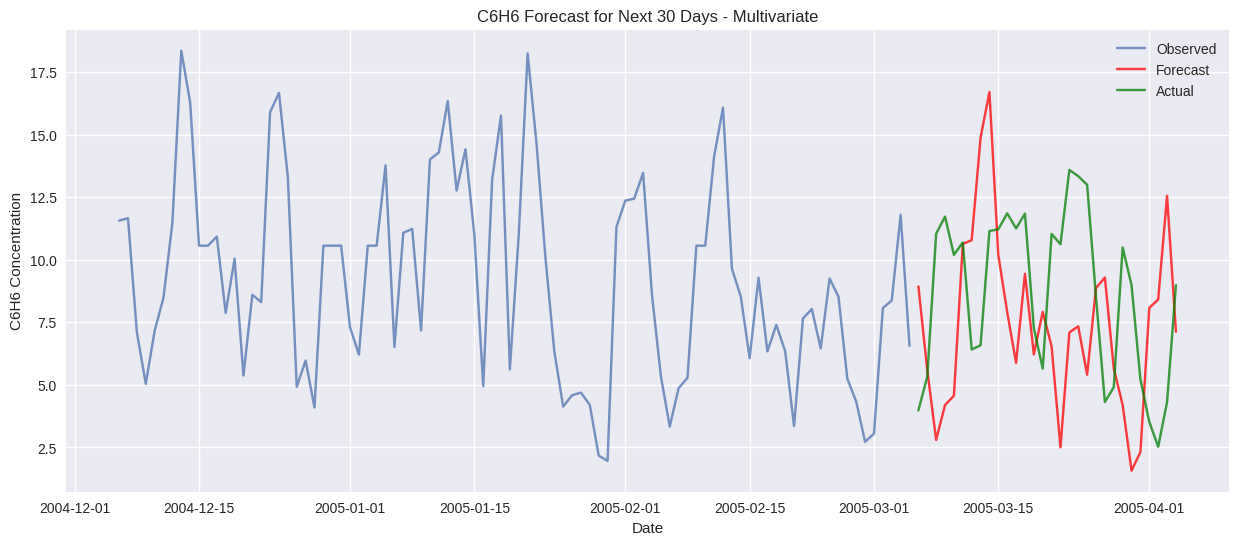

Mean Squared Error: 0.5702525598657548


In [180]:
# Select the endogenous variable
endog = daily_data['C6H6(GT)'][:-30]
#print(endog.isnull().sum())


# Select the exogenous variables - all other columns except for the one we are forecasting
exog = daily_data.drop('C6H6(GT)', axis=1)[:-30]
#print(exog.isnull().sum())

forecast_period = 30

# Define the SARIMAX model order and seasonal order
order = (1, 0, 1)
seasonal_order = (1, 1, 1, 7)  # Weekly seasonality for daily data

# Forecasting
c6h6_forecast, c6h6_mse = forecast_sarimax_multi(endog, exog, order, seasonal_order, forecast_period)

import matplotlib.pyplot as plt
# Assuming 'actual_forecast_values' contains the actual values for the forecast period
actual_forecast_values = daily_data['C6H6(GT)'][-forecast_period:]

# Plotting the forecast and actual values
plt.figure(figsize=(15, 6))
plt.plot(endog[-90:], label='Observed', alpha=0.75)  # last 90 days (3 months)
plt.plot(c6h6_forecast, label='Forecast', color='red', alpha=0.75)
plt.plot(actual_forecast_values.index, actual_forecast_values, label='Actual', color='green', alpha=0.75)
plt.title('C6H6 Forecast for Next 30 Days - Multivariate')
plt.xlabel('Date')
plt.ylabel('C6H6 Concentration')
plt.legend()
plt.show()

# If MSE was calculated, print it
if c6h6_mse is not None:
    print("Mean Squared Error:", c6h6_mse)

In [181]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")

    for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [182]:
ad_test(daily_data['NOx(GT)'])

1. ADF :  -2.335389483242191
2. P-Value :  0.16080799852807498
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression: 382
5. Critical Values :
	 1% :  -3.4475850438570115
	 5% :  -2.869135963767125
	 10% :  -2.5708164748773332


In [183]:
# # Load the dataset
df = pd.read_csv('/content/cleaned_air.csv')
# df.rename(columns={"Unnamed: 0": "DateTime"})
# df= data


# # Convert the 'DateTime' column to datetime and set it as the index
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.set_index('DateTime', inplace=True)

# # We'll need to reset the index to have 'ds' and 'y' columns for Prophet
# df.reset_index(inplace=True)
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()


,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1.966667,1316.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
1,2004-03-11,2.313636,1265.409091,8.568182,879.954545,150.000000,1233.227273,102.863636,1550.727273,922.727273,9.804545,64.413636,0.778191
2,2004-03-12,2.900000,1309.285714,12.666667,1036.476190,181.000000,1052.619048,120.285714,1651.238095,1121.000000,11.838095,49.614286,0.667024
3,2004-03-13,2.740909,1346.227273,11.381818,1010.181818,187.863636,978.454545,120.500000,1613.954545,1268.818182,13.363636,49.918182,0.733727
4,2004-03-14,2.472727,1372.409091,9.836364,950.590909,150.090909,999.090909,111.681818,1608.409091,1240.545455,16.390909,47.631818,0.848382


In [184]:
import pandas as pd
from prophet import Prophet

# Rename the columns for compatibility with Prophet
df.rename(columns={'Date': 'ds', 'CO(GT)': 'y_CO', 'NOx(GT)': 'y_NOx', 'NO2(GT)': 'y_NO2', 'C6H6(GT)': 'y_C6H6'}, inplace=True)
df.head()

,ds,y_CO,PT08.S1(CO),y_C6H6,PT08.S2(NMHC),y_NOx,PT08.S3(NOx),y_NO2,PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1.966667,1316.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
1,2004-03-11,2.313636,1265.409091,8.568182,879.954545,150.000000,1233.227273,102.863636,1550.727273,922.727273,9.804545,64.413636,0.778191
2,2004-03-12,2.900000,1309.285714,12.666667,1036.476190,181.000000,1052.619048,120.285714,1651.238095,1121.000000,11.838095,49.614286,0.667024
3,2004-03-13,2.740909,1346.227273,11.381818,1010.181818,187.863636,978.454545,120.500000,1613.954545,1268.818182,13.363636,49.918182,0.733727
4,2004-03-14,2.472727,1372.409091,9.836364,950.590909,150.090909,999.090909,111.681818,1608.409091,1240.545455,16.390909,47.631818,0.848382


In [185]:
dataviz.tail()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2005-03-31,1.387500,1008.125000,5.220833,749.416667,185.083333,795.666667,100.708333,1176.541667,763.833333,17.550000,50.083333,0.951917
2005-04-01,1.108696,907.000000,3.526087,671.260870,166.826087,933.391304,110.217391,945.217391,532.695652,16.026087,35.404348,0.631135
2005-04-02,0.854167,890.958333,2.529167,616.291667,142.375000,991.750000,100.166667,864.333333,481.750000,15.483333,32.225000,0.546167
2005-04-03,1.141667,981.375000,4.316667,714.708333,167.666667,856.166667,111.125000,985.166667,717.083333,18.383333,33.695833,0.617583
2005-04-04,2.078571,1106.714286,8.985714,889.714286,278.428571,718.785714,127.642857,1212.000000,1031.428571,17.328571,41.842857,0.721250


In [186]:
# def fit_prophet(df, target_column):
#     # Initialize the Prophet model
#     model = Prophet()

#     # Add other pollutants as additional regressors
#     for col in df.columns:
#         if col.startswith('y_') and col != target_column:
#             if col not in df:
#                 raise ValueError(f"Missing exogenous regressor {col} in the DataFrame.")
#             model.add_regressor(col)

#     # Prepare the DataFrame for Prophet
#     prophet_df = df[['ds', target_column] + [col for col in df.columns if col.startswith('y_') and col != target_column]]
#     prophet_df.rename(columns={target_column: 'y'}, inplace=True)

#     # Check for missing values
#     if prophet_df.isnull().any().any():
#         raise ValueError("The DataFrame contains NaN values, which Prophet cannot handle.")

#     # Fit the model
#     model.fit(prophet_df)

#     return model

In [187]:
# # Fit separate models for each pollutant
# models = {}
# for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
#   print(pollutant)
#   models[pollutant] = fit_prophet(df, pollutant)

In [188]:

# # Forecast with each model
# future = models['y_CO'].make_future_dataframe(periods=30)  # For example, forecast 30 days into the future
# forecast = {}
# for pollutant in models:
#     forecast[pollutant] = models[pollutant].predict(df.merge(future))

In [189]:
# from prophet import Prophet

# # Assuming df is your complete dataset
# # Define the point at which to split the data into training and test sets
# split_date = '2004-11-10'  # Example split date, adjust to your needs

# # Create the training dataset (up to split_date)
# training_data = df[df['ds'] <= split_date]

# # Create the test dataset (after split_date)
# test_data = df[df['ds'] > split_date]

# # Now, let's prepare the models and forecast
# models = {}
# forecasts = {}
# for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
#     print(f'Fitting model for {pollutant}')

#     # Rename the target column to 'y' for compatibility with Prophet
#     train = training_data[['ds', pollutant]].rename(columns={pollutant: 'y'})

#     # Initialize and fit the Prophet model
#     model = Prophet()
#     model.fit(train)

#     # Store the model
#     models[pollutant] = model

#     # Create a future DataFrame that includes dates from the test set
#     future = model.make_future_dataframe(periods=test_data['ds'].nunique(), freq='D')

#     # Predict over the future DataFrame
#     forecast = model.predict(future)

#     # Store the forecasts
#     forecasts[pollutant] = forecast

# # Now you have the forecasts for each pollutant in the forecasts dictionary
# # You can plot these forecasts and calculate accuracy against the test set


In [190]:
from prophet import Prophet

# Assuming df is your complete dataset
# Calculate the index for the split
split_idx = int(df.shape[0] * 0.8)

# Create the training dataset (first 80% of the data)
training_data = df.iloc[:split_idx]

# Create the test dataset (remaining 20% of the data)
test_data = df.iloc[split_idx:]

# Now, let's prepare the models and forecast
models = {}
forecasts = {}
for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
    print(f'Fitting model for {pollutant}')

    # Rename the target column to 'y' for compatibility with Prophet
    train = training_data[['ds', pollutant]].rename(columns={pollutant: 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train)

    # Store the model
    models[pollutant] = model

    # Create a future DataFrame for the test set time frame
    future = model.make_future_dataframe(periods=test_data.shape[0], freq='D')

    # Predict over the future DataFrame
    forecast = model.predict(future)

    # Store the forecasts
    forecasts[pollutant] = forecast


Fitting model for y_CO


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/cykjm2f5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/u9wavohx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66792', 'data', 'file=/tmp/tmphsn_vtro/cykjm2f5.json', 'init=/tmp/tmphsn_vtro/u9wavohx.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_model24dyt70b/prophet_model-20231211020021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Fitting model for y_NOx
Fitting model for y_NO2


DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/wcj5w4h4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/op2ex6s3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75335', 'data', 'file=/tmp/tmphsn_vtro/wcj5w4h4.json', 'init=/tmp/tmphsn_vtro/op2ex6s3.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modelqv19i4i8/prophet_model-20231211020021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

Fitting model for y_C6H6


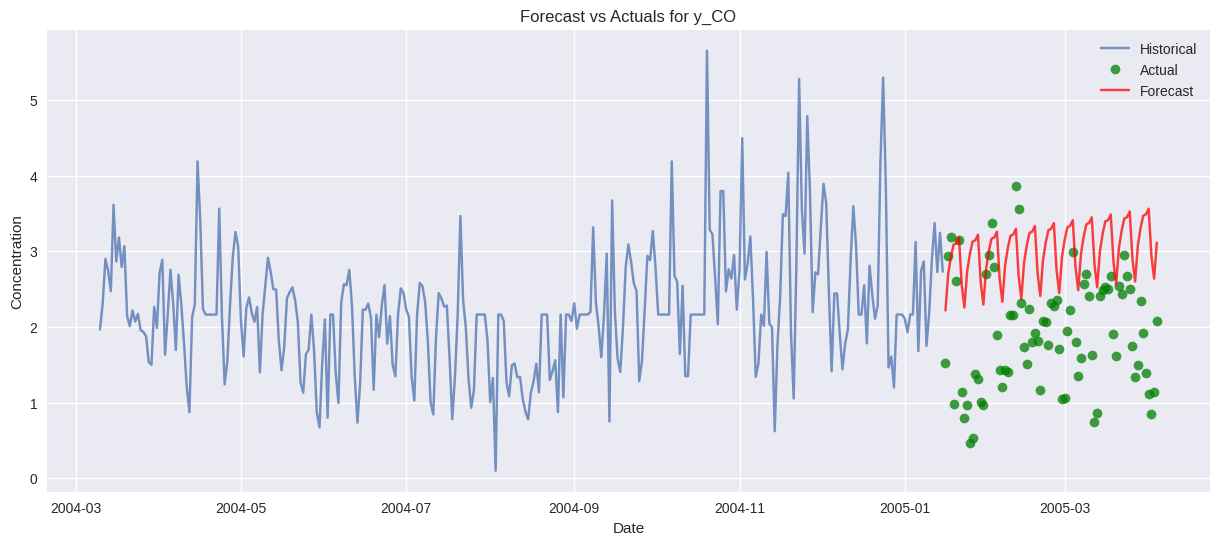

y_CO - MSE: 1.6387969622660852, RMSE: 1.2801550539938844


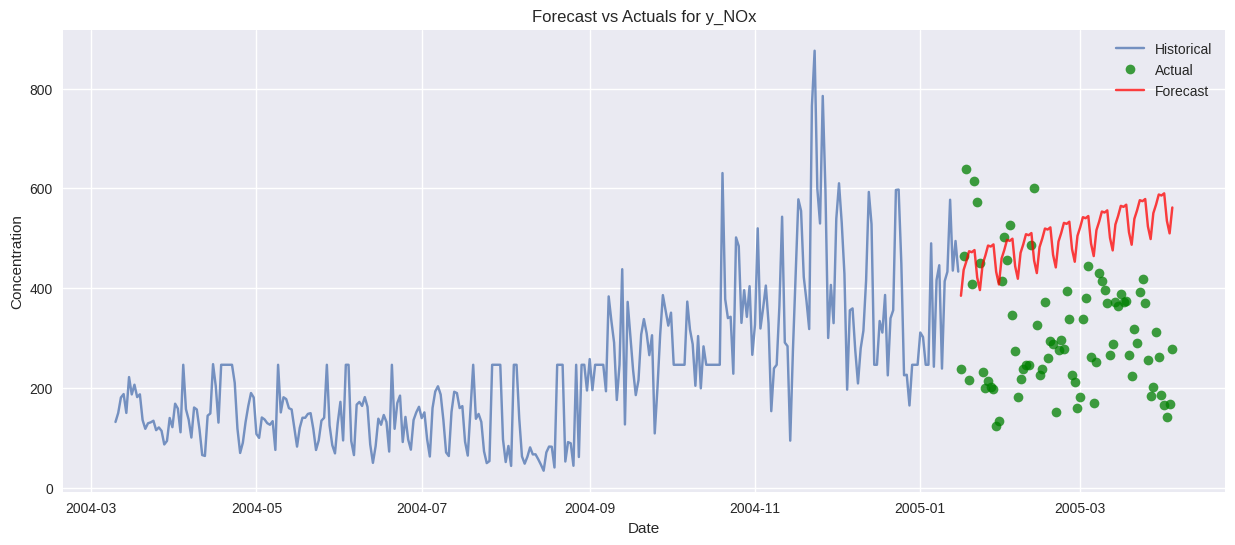

y_NOx - MSE: 53031.49714924813, RMSE: 230.2856859408507


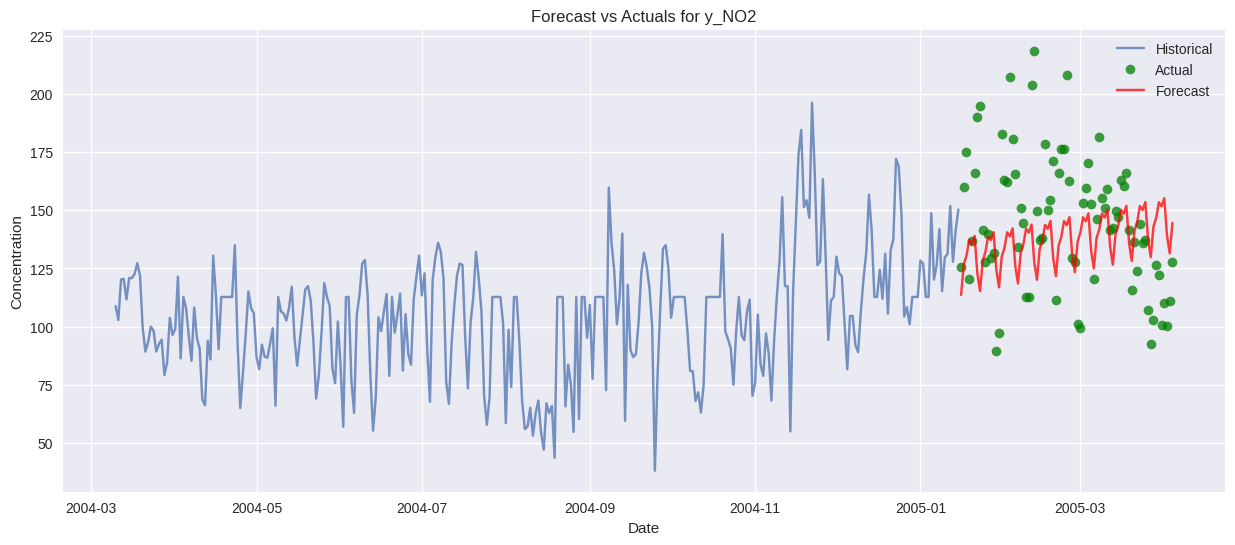

y_NO2 - MSE: 951.4866167967489, RMSE: 30.846176696581846


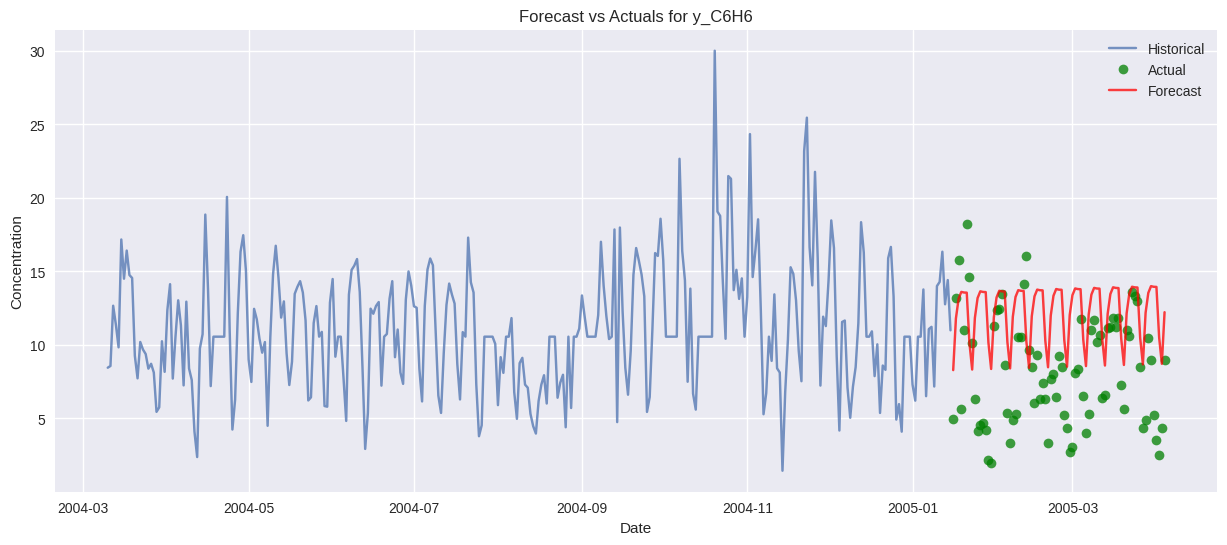

y_C6H6 - MSE: 26.510577210688098, RMSE: 5.1488423175203275


In [191]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# Convert 'ds' column to datetime if it's not already
training_data['ds'] = pd.to_datetime(training_data['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])

# Remove timezone information if it exists
for df in [training_data, test_data]:
    if df['ds'].dt.tz is not None:
        df['ds'] = df['ds'].dt.tz_localize(None)

# Assuming 'forecasts' is a dictionary containing DataFrames
for key in forecasts:
    forecast_df = forecasts[key]
    if forecast_df['ds'].dt.tz is not None:
        forecast_df['ds'] = forecast_df['ds'].dt.tz_localize(None)
    forecasts[key] = forecast_df

# After fitting the model and making forecasts
for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
    # Extract the predictions for the test set dates
    forecast_test_period = forecasts[pollutant][forecasts[pollutant]['ds'].isin(test_data['ds'])]

    # Ensure test_data only includes the dates that are also in the forecast
    matching_test_data = test_data[test_data['ds'].isin(forecast_test_period['ds'])]

    # Plot the historical data, the forecast, and the actuals
    plt.figure(figsize=(15, 6))
    plt.plot(training_data['ds'], training_data[pollutant], label='Historical', alpha=0.75)
    plt.plot(matching_test_data['ds'], matching_test_data[pollutant], 'o', label='Actual', color='green', alpha=0.75)
    plt.plot(forecast_test_period['ds'], forecast_test_period['yhat'], label='Forecast', color='red', alpha=0.75)
    plt.title(f'Forecast vs Actuals for {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()
    plt.show()

    # Calculate MSE and RMSE
    mse = mean_squared_error(matching_test_data[pollutant], forecast_test_period['yhat'].head(len(matching_test_data)))
    rmse = sqrt(mse)
    print(f'{pollutant} - MSE: {mse}, RMSE: {rmse}')


In [192]:
from datetime import datetime

# Define the start and end dates
start_date = datetime(2004, 3, 10)
end_date = datetime(2005, 4, 4)

# Calculate the number of days between the two dates
number_of_days = (end_date - start_date).days
number_of_days

390

In [193]:
df = pd.read_csv('/content/cleaned_air.csv')
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
# df= data


# # Convert the 'DateTime' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# # We'll need to reset the index to have 'ds' and 'y' columns for Prophet
# df.reset_index(inplace=True)


df.head()

,Date,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,1.966667,1316.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
1,2004-03-11,2.313636,1265.409091,8.568182,879.954545,150.000000,1233.227273,102.863636,1550.727273,922.727273,9.804545,64.413636,0.778191
2,2004-03-12,2.900000,1309.285714,12.666667,1036.476190,181.000000,1052.619048,120.285714,1651.238095,1121.000000,11.838095,49.614286,0.667024
3,2004-03-13,2.740909,1346.227273,11.381818,1010.181818,187.863636,978.454545,120.500000,1613.954545,1268.818182,13.363636,49.918182,0.733727
4,2004-03-14,2.472727,1372.409091,9.836364,950.590909,150.090909,999.090909,111.681818,1608.409091,1240.545455,16.390909,47.631818,0.848382


In [194]:
df['Date']

0     2004-03-10
1     2004-03-11
2     2004-03-12
3     2004-03-13
4     2004-03-14
         ...    
386   2005-03-31
387   2005-04-01
388   2005-04-02
389   2005-04-03
390   2005-04-04
Name: Date, Length: 391, dtype: datetime64[ns]

In [195]:
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
print(full_index)

dataviz = dataviz[~dataviz.index.duplicated()]  # Remove duplicates if any
dataviz.index.freq = dataviz.index.inferred_freq


DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='D')


In [196]:
# df.reset_index(drop=True, inplace=True)
# df.shape

In [197]:
df.rename(columns={'Date': 'ds', 'CO(GT)': 'y_CO', 'NOx(GT)': 'y_NOx', 'NO2(GT)': 'y_NO2', 'C6H6(GT)': 'y_C6H6'}, inplace=True)
df.tail()

,ds,y_CO,PT08.S1(CO),y_C6H6,PT08.S2(NMHC),y_NOx,PT08.S3(NOx),y_NO2,PT08.S4(NO2),PT08.S5(O3),T,RH,AH
386,2005-03-31,1.387500,1008.125000,5.220833,749.416667,185.083333,795.666667,100.708333,1176.541667,763.833333,17.550000,50.083333,0.951917
387,2005-04-01,1.108696,907.000000,3.526087,671.260870,166.826087,933.391304,110.217391,945.217391,532.695652,16.026087,35.404348,0.631135
388,2005-04-02,0.854167,890.958333,2.529167,616.291667,142.375000,991.750000,100.166667,864.333333,481.750000,15.483333,32.225000,0.546167
389,2005-04-03,1.141667,981.375000,4.316667,714.708333,167.666667,856.166667,111.125000,985.166667,717.083333,18.383333,33.695833,0.617583
390,2005-04-04,2.078571,1106.714286,8.985714,889.714286,278.428571,718.785714,127.642857,1212.000000,1031.428571,17.328571,41.842857,0.721250


In [198]:
df.isnull().sum()

ds               0
y_CO             0
PT08.S1(CO)      0
y_C6H6           0
PT08.S2(NMHC)    0
y_NOx            0
PT08.S3(NOx)     0
y_NO2            0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [199]:
from prophet import Prophet

split_idx = int(df.shape[0] * 0.8)
training_data = df.iloc[:split_idx]
test_data = df.iloc[split_idx:]

models = {}
forecasts = {}
for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
    print(f'Fitting model for {pollutant}')

    model = Prophet()
    for col in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
        if col != pollutant:
            model.add_regressor(col)

    train = training_data[['ds', pollutant] + [col for col in df.columns if col.startswith('y_') and col != pollutant]]
    train.rename(columns={pollutant: 'y'}, inplace=True)
    model.fit(train)
    models[pollutant] = model

    # Create a future DataFrame aligned with the test set
    future = model.make_future_dataframe(periods=len(test_data), freq='D')
    future = future.tail(len(test_data))  # Keep only the rows corresponding to the test set
    #print(test_data.isnull().sum())
    # Add regressor values
    #print(future)
    for col in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
        if col != pollutant:
            #print(test_data[col])
            future[col] = test_data[col]

    #print(future)
    forecast = model.predict(future)
    forecasts[pollutant] = forecast


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/16dhomt6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/3vez7pn8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45995', 'data', 'file=/tmp/tmphsn_vtro/16dhomt6.json', 'init=/tmp/tmphsn_vtro/3vez7pn8.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modelj9s4pd0n/prophet_model-20231211020049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonalit

Fitting model for y_CO
Fitting model for y_NOx


DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/r9c17a8f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/_gu5j5dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56926', 'data', 'file=/tmp/tmphsn_vtro/r9c17a8f.json', 'init=/tmp/tmphsn_vtro/_gu5j5dx.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_model4ph2myc2/prophet_model-20231211020049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp

Fitting model for y_NO2
Fitting model for y_C6H6


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81021', 'data', 'file=/tmp/tmphsn_vtro/wd7dryt3.json', 'init=/tmp/tmphsn_vtro/_omgrydh.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modely97p315w/prophet_model-20231211020049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


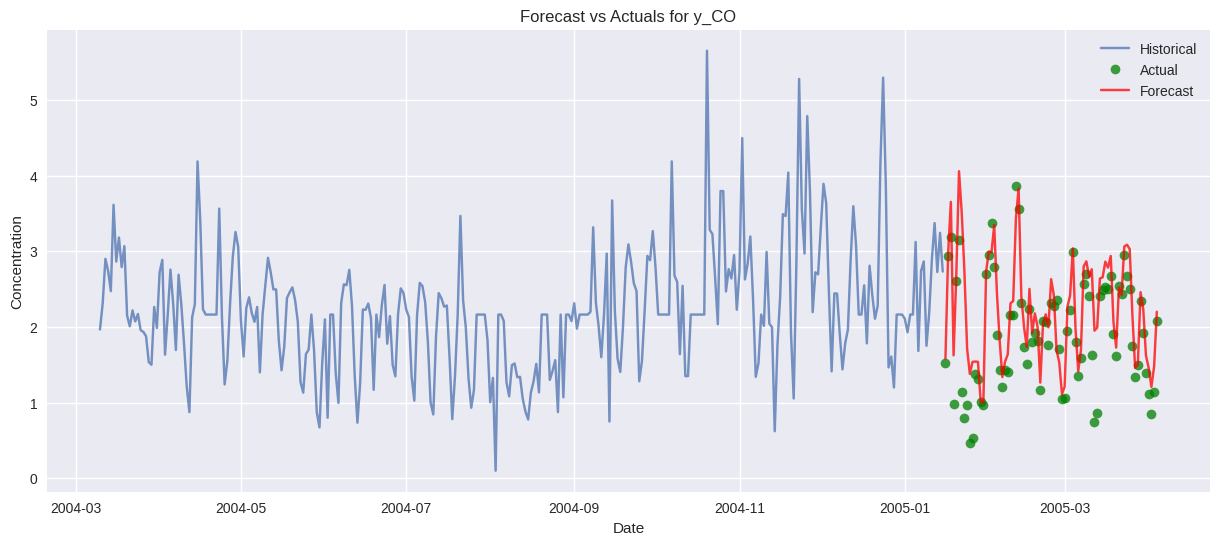

y_CO - MSE: 0.2728662945745823, RMSE: 0.5223660541943573


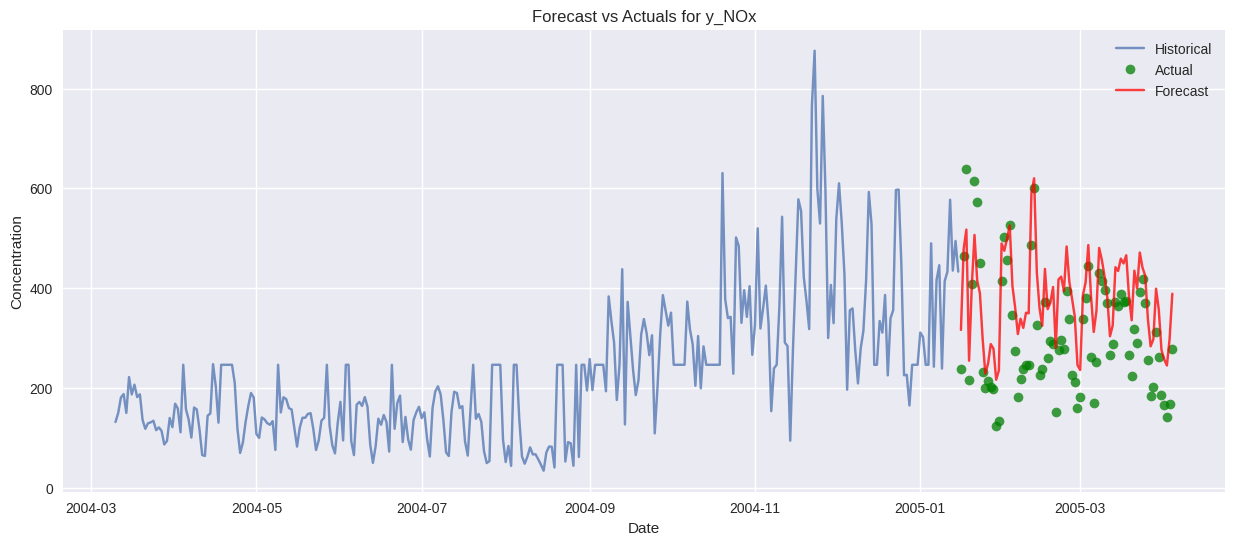

y_NOx - MSE: 8077.312300457268, RMSE: 89.8738688410445


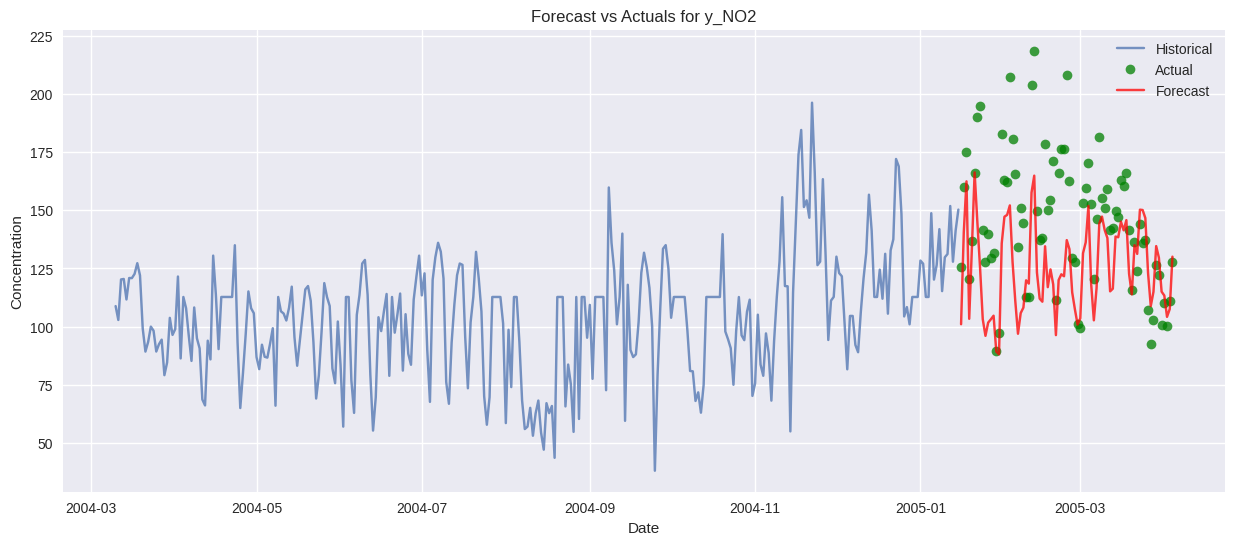

y_NO2 - MSE: 873.5093750547344, RMSE: 29.555192015189725


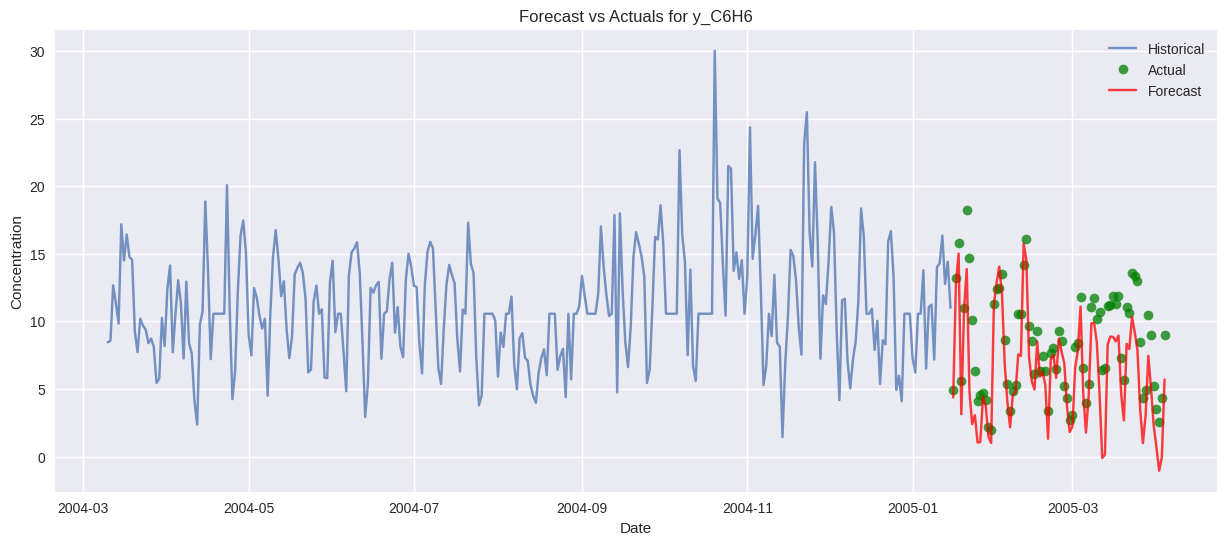

y_C6H6 - MSE: 8.469154155029656, RMSE: 2.91018112065721


In [200]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# Convert 'ds' column to datetime if it's not already
training_data['ds'] = pd.to_datetime(training_data['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])

# Remove timezone information if it exists
for df in [training_data, test_data]:
    if df['ds'].dt.tz is not None:
        df['ds'] = df['ds'].dt.tz_localize(None)

# Assuming 'forecasts' is a dictionary containing DataFrames
for key in forecasts:
    forecast_df = forecasts[key]
    if forecast_df['ds'].dt.tz is not None:
        forecast_df['ds'] = forecast_df['ds'].dt.tz_localize(None)
    forecasts[key] = forecast_df

# After fitting the model and making forecasts
for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
    # Extract the predictions for the test set dates
    forecast_test_period = forecasts[pollutant][forecasts[pollutant]['ds'].isin(test_data['ds'])]

    # Ensure test_data only includes the dates that are also in the forecast
    matching_test_data = test_data[test_data['ds'].isin(forecast_test_period['ds'])]

    # Plot the historical data, the forecast, and the actuals
    plt.figure(figsize=(15, 6))
    plt.plot(training_data['ds'], training_data[pollutant], label='Historical', alpha=0.75)
    plt.plot(matching_test_data['ds'], matching_test_data[pollutant], 'o', label='Actual', color='green', alpha=0.75)
    plt.plot(forecast_test_period['ds'], forecast_test_period['yhat'], label='Forecast', color='red', alpha=0.75)
    plt.title(f'Forecast vs Actuals for {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()
    plt.show()

    # Calculate MSE and RMSE
    mse = mean_squared_error(matching_test_data[pollutant], forecast_test_period['yhat'].head(len(matching_test_data)))
    rmse = sqrt(mse)
    print(f'{pollutant} - MSE: {mse}, RMSE: {rmse}')

In [201]:
df= df_hourly
df.rename(columns={'DateTime': 'ds', 'CO(GT)': 'y_CO', 'NOx(GT)': 'y_NOx', 'NO2(GT)': 'y_NO2', 'C6H6(GT)': 'y_C6H6'}, inplace=True)
df.head()

,y_CO,PT08.S1(CO),y_C6H6,PT08.S2(NMHC),y_NOx,PT08.S3(NOx),y_NO2,PT08.S4(NO2),PT08.S5(O3),T,RH,AH,ds
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [202]:
from prophet import Prophet

# Assuming df is your complete dataset
# Calculate the index for the split
split_idx = int(df.shape[0] * 0.8)

# Create the training dataset (first 80% of the data)
training_data = df.iloc[:split_idx]

# Create the test dataset (remaining 20% of the data)
test_data = df.iloc[split_idx:]

# Now, let's prepare the models and forecast
models = {}
forecasts = {}
for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
    print(f'Fitting model for {pollutant}')

    # Rename the target column to 'y' for compatibility with Prophet
    train = training_data[['ds', pollutant]].rename(columns={pollutant: 'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train)

    # Store the model
    models[pollutant] = model

    # Create a future DataFrame for the test set time frame
    future = model.make_future_dataframe(periods=test_data.shape[0], freq='H')

    # Predict over the future DataFrame
    forecast = model.predict(future)

    # Store the forecasts
    forecasts[pollutant] = forecast


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/dk79m3e0.json


Fitting model for y_CO


DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/2jt83yzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50164', 'data', 'file=/tmp/tmphsn_vtro/dk79m3e0.json', 'init=/tmp/tmphsn_vtro/2jt83yzt.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modelk65hilj4/prophet_model-20231211020057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:00:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/ppc4pelm.json


Fitting model for y_NOx


DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/2dtvcs8v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16726', 'data', 'file=/tmp/tmphsn_vtro/ppc4pelm.json', 'init=/tmp/tmphsn_vtro/2dtvcs8v.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modelrkj97q1f/prophet_model-20231211020059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:00:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/23zc51f0.json


Fitting model for y_NO2


DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/_gg23ppr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77565', 'data', 'file=/tmp/tmphsn_vtro/23zc51f0.json', 'init=/tmp/tmphsn_vtro/_gg23ppr.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modelkxlk0e8y/prophet_model-20231211020102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/z_p_pp8b.json


Fitting model for y_C6H6


DEBUG:cmdstanpy:input tempfile: /tmp/tmphsn_vtro/kxssdt6j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62853', 'data', 'file=/tmp/tmphsn_vtro/z_p_pp8b.json', 'init=/tmp/tmphsn_vtro/kxssdt6j.json', 'output', 'file=/tmp/tmphsn_vtro/prophet_modeludpgjk68/prophet_model-20231211020104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:01:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:01:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


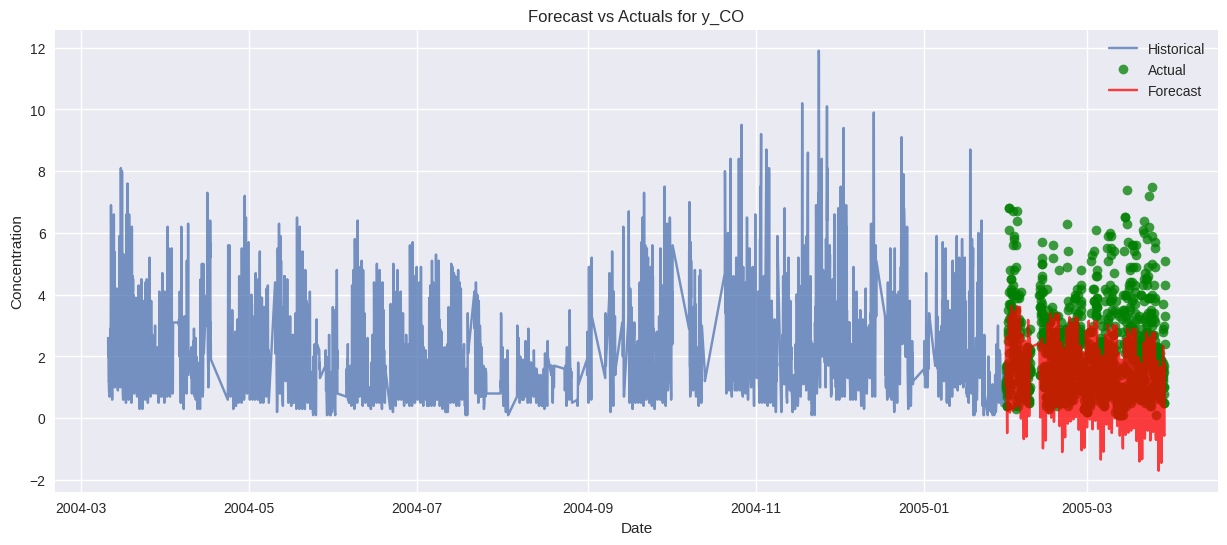

y_CO - MSE: 1.7260568222908725, RMSE: 1.3137948174242706


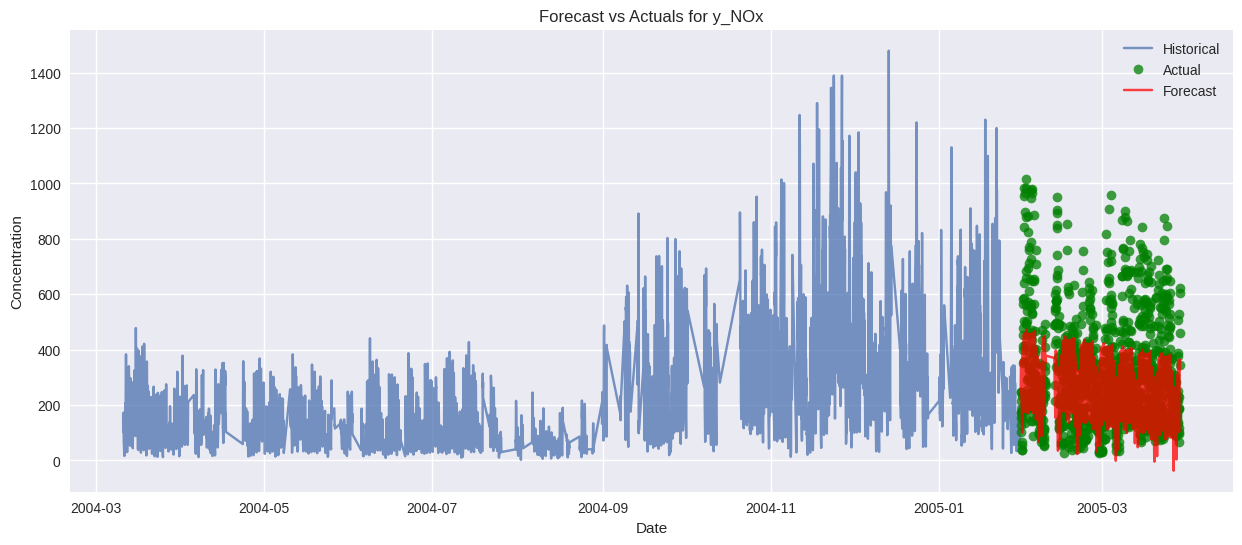

y_NOx - MSE: 25123.83696594278, RMSE: 158.50500612265463


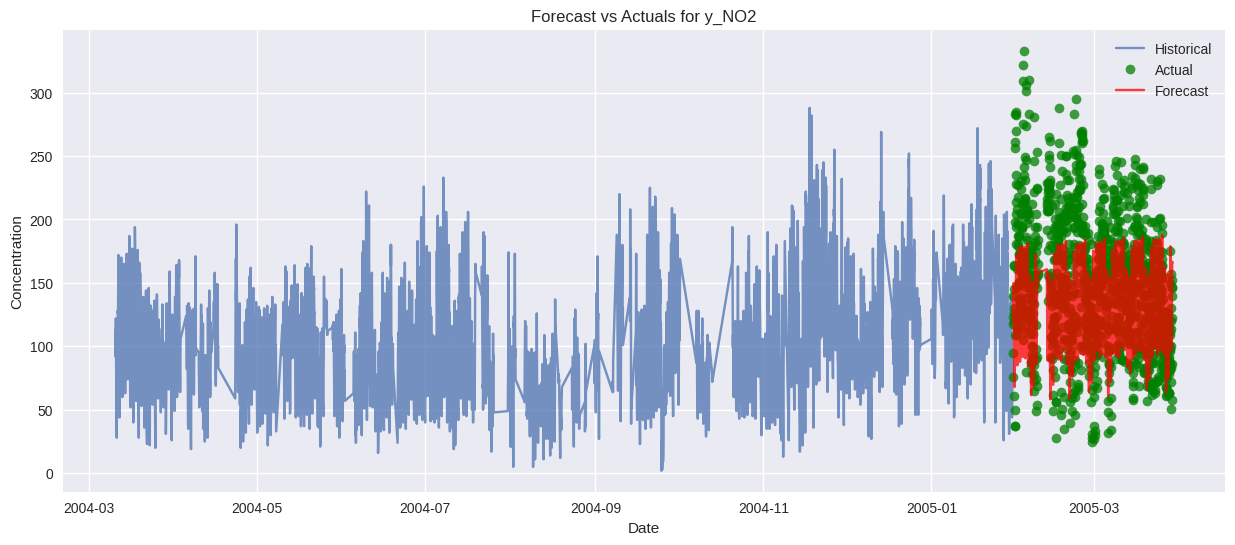

y_NO2 - MSE: 1744.5505295472453, RMSE: 41.76781691143607


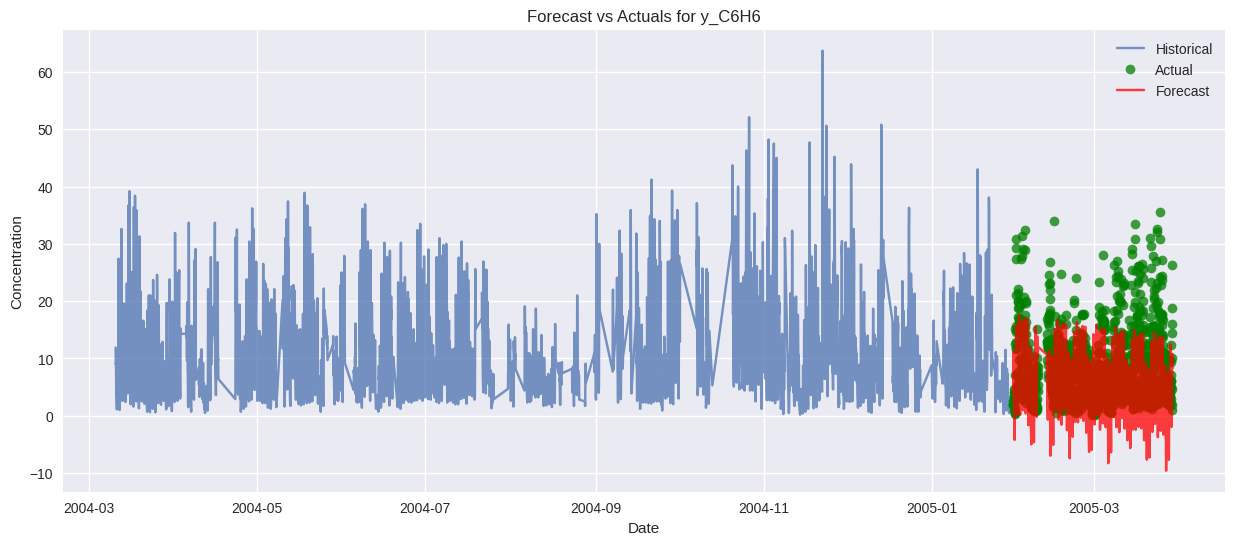

y_C6H6 - MSE: 31.830429855051435, RMSE: 5.641846316149655


In [203]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

# Convert 'ds' column to datetime if it's not already
training_data['ds'] = pd.to_datetime(training_data['ds'])
test_data['ds'] = pd.to_datetime(test_data['ds'])

# Remove timezone information if it exists
for df in [training_data, test_data]:
    if df['ds'].dt.tz is not None:
        df['ds'] = df['ds'].dt.tz_localize(None)

# Assuming 'forecasts' is a dictionary containing DataFrames
for key in forecasts:
    forecast_df = forecasts[key]
    if forecast_df['ds'].dt.tz is not None:
        forecast_df['ds'] = forecast_df['ds'].dt.tz_localize(None)
    forecasts[key] = forecast_df

# After fitting the model and making forecasts
for pollutant in ['y_CO', 'y_NOx', 'y_NO2', 'y_C6H6']:
    # Extract the predictions for the test set dates
    forecast_test_period = forecasts[pollutant][forecasts[pollutant]['ds'].isin(test_data['ds'])]

    # Ensure test_data only includes the dates that are also in the forecast
    matching_test_data = test_data[test_data['ds'].isin(forecast_test_period['ds'])]

    # Plot the historical data, the forecast, and the actuals
    plt.figure(figsize=(15, 6))
    plt.plot(training_data['ds'], training_data[pollutant], label='Historical', alpha=0.75)
    plt.plot(matching_test_data['ds'], matching_test_data[pollutant], 'o', label='Actual', color='green', alpha=0.75)
    plt.plot(forecast_test_period['ds'], forecast_test_period['yhat'], label='Forecast', color='red', alpha=0.75)
    plt.title(f'Forecast vs Actuals for {pollutant}')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.legend()
    plt.show()

    # Calculate MSE and RMSE
    mse = mean_squared_error(matching_test_data[pollutant], forecast_test_period['yhat'].head(len(matching_test_data)))
    rmse = sqrt(mse)
    print(f'{pollutant} - MSE: {mse}, RMSE: {rmse}')